In [162]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm 
import seaborn as sns
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf
from numpy import linspace
from scipy.stats import norm


In [163]:
df = pd.read_csv('us_consumption.csv')
min_month = "1970-01"
max_month = "2019-06"
 
months = pd.period_range(min_month, max_month, freq='Q')
df = df.set_index(months)

In [164]:
df.head()

,Unnamed: 0,Quarter,Consumption,Income,Production,Savings,Unemployment
1970Q1,1,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9
1970Q2,2,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5
1970Q3,3,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5
1970Q4,4,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7
1971Q1,5,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1


In [165]:
df.shape

(198, 7)

In [166]:
df.columns

Index(['Unnamed: 0', 'Quarter', 'Consumption', 'Income', 'Production',
       'Savings', 'Unemployment'],
      dtype='object')

In [167]:
df['Quarter'].unique()

array(['1970 Q1', '1970 Q2', '1970 Q3', '1970 Q4', '1971 Q1', '1971 Q2',
       '1971 Q3', '1971 Q4', '1972 Q1', '1972 Q2', '1972 Q3', '1972 Q4',
       '1973 Q1', '1973 Q2', '1973 Q3', '1973 Q4', '1974 Q1', '1974 Q2',
       '1974 Q3', '1974 Q4', '1975 Q1', '1975 Q2', '1975 Q3', '1975 Q4',
       '1976 Q1', '1976 Q2', '1976 Q3', '1976 Q4', '1977 Q1', '1977 Q2',
       '1977 Q3', '1977 Q4', '1978 Q1', '1978 Q2', '1978 Q3', '1978 Q4',
       '1979 Q1', '1979 Q2', '1979 Q3', '1979 Q4', '1980 Q1', '1980 Q2',
       '1980 Q3', '1980 Q4', '1981 Q1', '1981 Q2', '1981 Q3', '1981 Q4',
       '1982 Q1', '1982 Q2', '1982 Q3', '1982 Q4', '1983 Q1', '1983 Q2',
       '1983 Q3', '1983 Q4', '1984 Q1', '1984 Q2', '1984 Q3', '1984 Q4',
       '1985 Q1', '1985 Q2', '1985 Q3', '1985 Q4', '1986 Q1', '1986 Q2',
       '1986 Q3', '1986 Q4', '1987 Q1', '1987 Q2', '1987 Q3', '1987 Q4',
       '1988 Q1', '1988 Q2', '1988 Q3', '1988 Q4', '1989 Q1', '1989 Q2',
       '1989 Q3', '1989 Q4', '1990 Q1', '1990 Q2', 

In [168]:
df = df.drop(columns=['Quarter'])

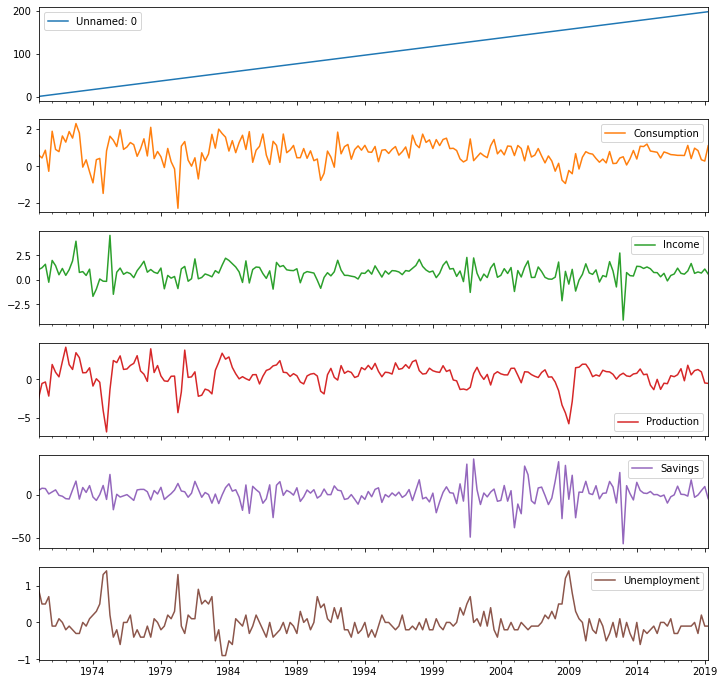

In [169]:
df.plot.line(subplots=True, figsize=(12,12))
plt.show()

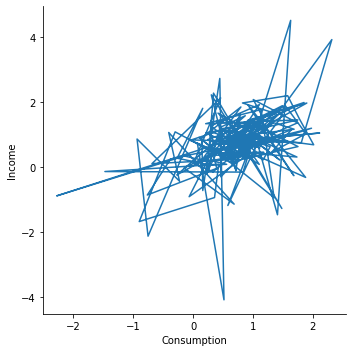

In [170]:
consumption_vs_income = sns.relplot(x="Consumption", y="Income", kind="line",sort=False, data=df)

In [171]:
predictors = df[['Income','Production','Savings','Unemployment']]

In [172]:
predictors

,Income,Production,Savings,Unemployment
1970Q1,1.044801,-2.452486,5.299014,0.9
1970Q2,1.225647,-0.551459,7.789894,0.5
1970Q3,1.585154,-0.358652,7.403984,0.5
1970Q4,-0.239545,-2.185691,1.169898,0.7
1971Q1,1.975925,1.909764,3.535667,-0.1
...,...,...,...,...
2018Q2,0.661825,1.117424,-2.723974,0.0
2018Q3,0.806271,1.256722,-0.085686,-0.3
2018Q4,0.695142,0.948148,5.031337,0.2
2019Q1,1.100753,-0.488206,9.760287,-0.1


In [173]:
response = df['Consumption']

In [174]:
response

1970Q1    0.618566
1970Q2    0.451984
1970Q3    0.872872
1970Q4   -0.271848
1971Q1    1.901345
            ...   
2018Q2    0.983112
2018Q3    0.853181
2018Q4    0.356512
2019Q1    0.282885
2019Q2    1.113517
Freq: Q-DEC, Name: Consumption, Length: 198, dtype: float64

In [175]:
auto = pm.auto_arima(y=response, exogenous=predictors, suppress_warnings=False, 
                     stationary=True, maxiter=100)
auto.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  198
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -43.889
Date:                Mon, 11 Apr 2022   AIC                            103.777
Time:                        22:02:30   BIC                            130.083
Sample:                    03-31-1970   HQIC                           114.425
                         - 06-30-2019                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.4197      0.078      5.382      0.000       0.267       0.572
Income           0.7611      0.031     24.904      0.000       0.701       0.821
Production       0.0487      0.024      2.055      0.040       0.002       0.095
Savings         -0.0542      0.002    -27.750      0.000      -0.058      -0.050
Unemployment    -0.1470      0.114     -1.289      0.198      -0.371       0.077
ar.L1           -0.7563      0.224     -3.372      0.001      -1.196      -0.317
ma.L1            0.6431      0.263      2.444      0.015       0.127       1.159
sigma2           0.0912      0.008     12.140      0.000       0.076       0.106
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                24.56
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             0.47
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [186]:
model = sm.tsa.SARIMAX(endog=response, exog=predictors, trend='c', order=(1, 0, 1))
result = model.fit(disp=False)
result.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                  198
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -43.889
Date:                Mon, 11 Apr 2022   AIC                            103.777
Time:                        22:17:53   BIC                            130.083
Sample:                    03-31-1970   HQIC                           114.425
                         - 06-30-2019                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.4197      0.078      5.381      0.000       0.267       0.573
Income           0.7609      0.031     24.892      0.000       0.701       0.821
Production       0.0486      0.024      2.051      0.040       0.002       0.095
Savings         -0.0542      0.002    -27.736      0.000      -0.058      -0.050
Unemployment    -0.1477      0.114     -1.295      0.195      -0.371       0.076
ar.L1           -0.7560      0.224     -3.370      0.001      -1.196      -0.316
ma.L1            0.6427      0.263      2.441      0.015       0.127       1.159
sigma2           0.0912      0.008     12.138      0.000       0.076       0.106
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                24.55
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             0.47
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

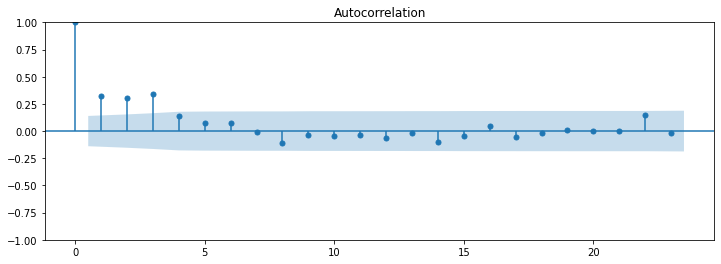

In [193]:
from statsmodels.graphics.tsaplots import plot_acf
def autocorrelation_plot(data): 
    fig = plt.figure(figsize=(12, 4))
    ax1 = fig.gca()    
    plot_acf(data, ax=ax1)
    plt.show()
    
autocorrelation_plot(response)

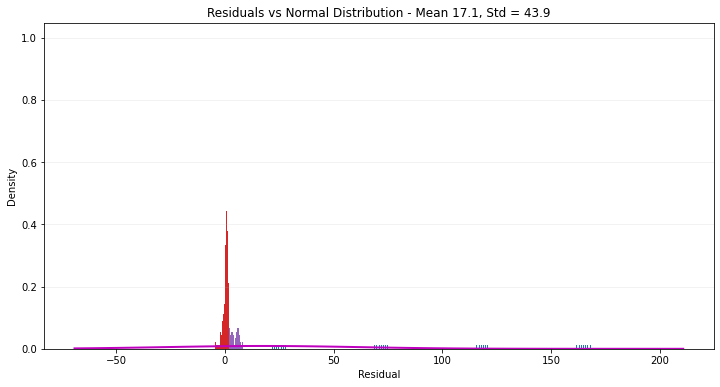

In [189]:
def resid_histogram(df):
    from numpy import linspace
    from scipy.stats import norm
    plt.figure(figsize=(12, 6))
    plt.hist(df, bins = 'auto', density = True, rwidth = 0.85, label ='Residuals')
    mean_resid, std_resid = norm.fit(df)
    xmin, xmax = plt.xlim()
    curve_length = linspace(xmin, xmax, 100)
    bell_curve = norm.pdf(curve_length, mean_resid, std_resid)
    plt.plot(curve_length, bell_curve, 'm', linewidth = 2)
    plt.grid(axis='y', alpha = 0.2)
    plt.xlabel('Residual')
    plt.ylabel('Density')
    plt.title(f'Residuals vs Normal Distribution - Mean {round(mean_resid, 1)}, Std = {round(std_resid, 1)}')
    plt.show()
    
resid_histogram(df)

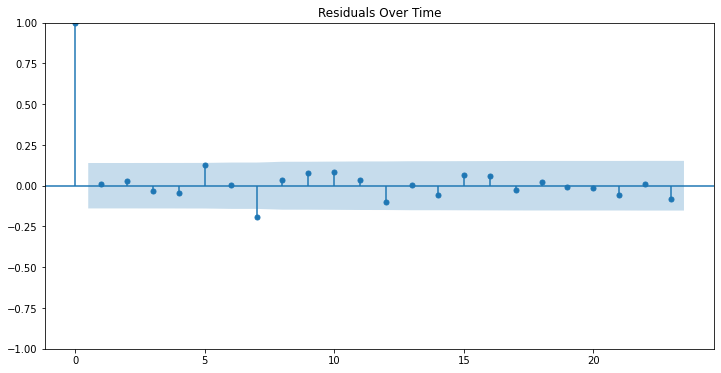

In [197]:
def residuals_over_time(data):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.gca()
    plot_acf(data, ax=ax1)
    plt.title('Residuals Over Time')
    plt.show()
    
residuals_over_time(result.resid)

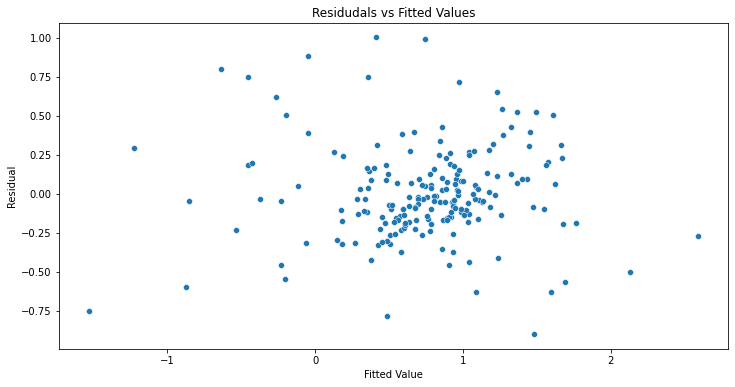

In [204]:
def residuals(data):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.gca()
    sns.scatterplot( x=data.fittedvalues, y=data.resid)
    plt.title('Residudals vs Fitted Values')
    plt.ylabel('Residual')
    plt.xlabel('Fitted Value')
    plt.show()
    
residuals(result)

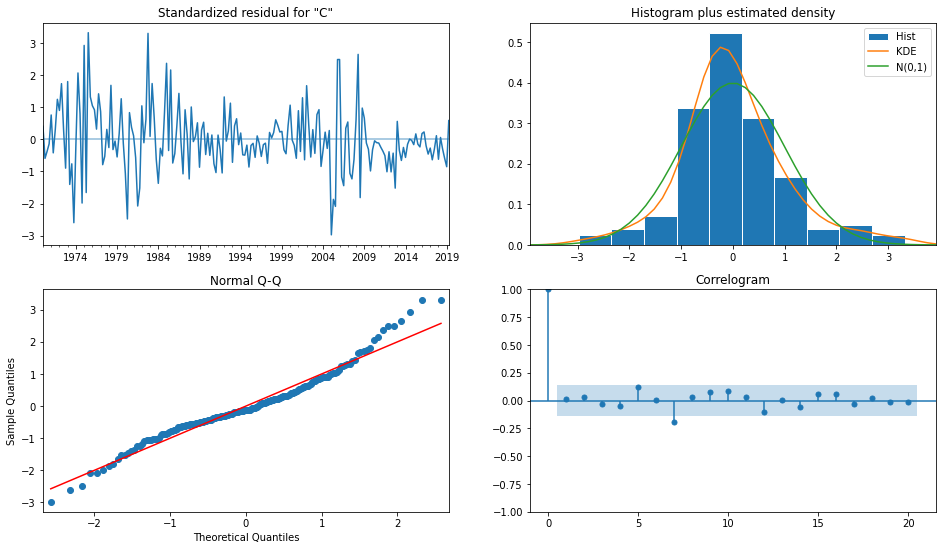

In [205]:
fig = plt.figure(figsize=(16, 9))
result.plot_diagnostics(fig=fig, lags=20)
plt.show()

In [224]:
current=predictors.iloc[-1,:]
scenerio=[]
num_quarters = 6
for i in range(num_quarters):
    current = current.copy()
    new_unemployment_rate = 1.0
    current.Unemployment += (new_unemployment_rate - current.Unemployment) / (num_quarters-1) * i
    scenerio.append(current)
scenerio

[Income          0.593399
 Production     -0.539949
 Savings        -4.264616
 Unemployment   -0.100000
 Name: 2019Q2, dtype: float64,
 Income          0.593399
 Production     -0.539949
 Savings        -4.264616
 Unemployment    0.120000
 Name: 2019Q2, dtype: float64,
 Income          0.593399
 Production     -0.539949
 Savings        -4.264616
 Unemployment    0.472000
 Name: 2019Q2, dtype: float64,
 Income          0.593399
 Production     -0.539949
 Savings        -4.264616
 Unemployment    0.788800
 Name: 2019Q2, dtype: float64,
 Income          0.593399
 Production     -0.539949
 Savings        -4.264616
 Unemployment    0.957760
 Name: 2019Q2, dtype: float64,
 Income          0.593399
 Production     -0.539949
 Savings        -4.264616
 Unemployment    1.000000
 Name: 2019Q2, dtype: float64]

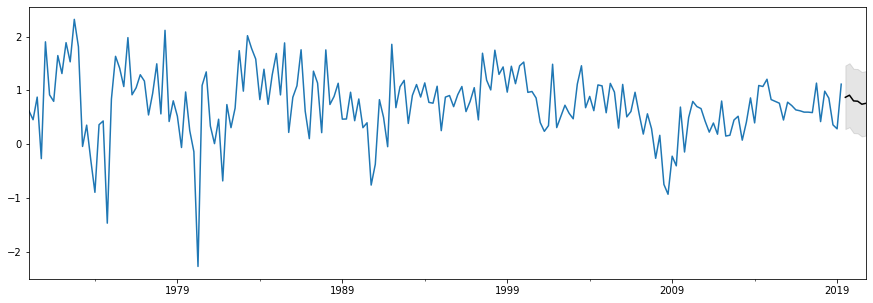

In [225]:
fig, ax = plt.subplots(figsize=(15, 5))
response.plot(ax=ax)
fcast = result.get_forecast(steps=6, exog=scenerio).summary_frame()
fcast['mean'].plot(ax=ax, style='k-')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)
plt.show()